In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from math import atan
import math
%matplotlib inline

## Load image

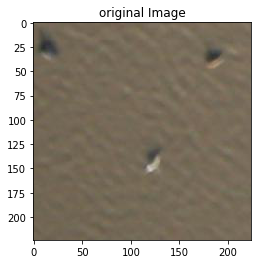

In [5]:
img = Image.open('./train/2_1.JPG')
img = np.array(img)
plt.imshow(img)
plt.title('original Image')
blur = cv2.GaussianBlur(img,(5,5),0)
gray = cv2.cvtColor(blur,cv2.COLOR_RGB2GRAY)
laplacian = cv2.Laplacian(gray,cv2.CV_64F)
sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)
sobel = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
sobel_ = np.maximum(sobel,50)
sobel_[sobel_==50]=0
canny = cv2.Canny(gray,100,200)
_, thresh = cv2.threshold(sobel_,200,255,cv2.THRESH_BINARY)

## Applied Filters

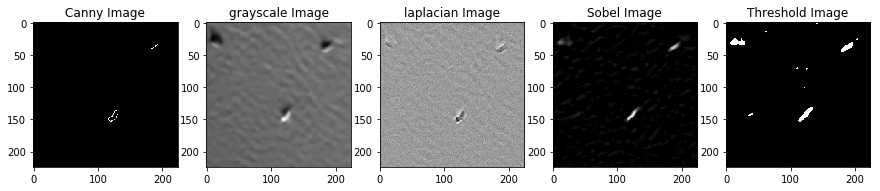

In [6]:
plt.figure(figsize=(15,10))
plt.subplot(1,5,1)
plt.imshow(canny,cmap='gray')
plt.title('Canny Image')

plt.subplot(1,5,2)
plt.imshow(gray,cmap='gray')
plt.title('grayscale Image')

plt.subplot(1,5,3)
plt.imshow(laplacian,cmap='gray')
plt.title('laplacian Image')

plt.subplot(1,5,4)
plt.imshow(sobel_,cmap='gray')
plt.title('Sobel Image')

plt.subplot(1,5,5)
plt.imshow(thresh,cmap='gray')
plt.title('Threshold Image')
plt.show()

## 2. Collecting non-zero values

In [7]:
xsobel,ysobel = np.nonzero(sobel_)
xthresh,ythresh = np.nonzero(thresh)

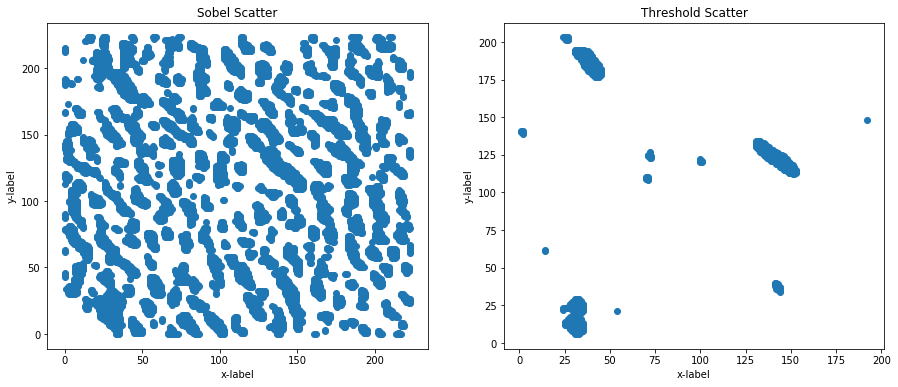

In [8]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(xsobel,ysobel)
plt.xlabel('x-label')
plt.ylabel('y-label')
plt.title('Sobel Scatter')
plt.subplot(1,2,2)
plt.scatter(xthresh,ythresh)
plt.xlabel('x-label')
plt.ylabel('y-label')
plt.title('Threshold Scatter')

plt.show()

## Covariance
- how the points are moving together
- considering sobel filter and threshold (sobel)

In [9]:
# sobel covariance
cov_sobel = np.cov(xsobel,ysobel)
evals_sobel, evecs_sobel = np.linalg.eig(cov_sobel)
# threshold covariance
cov_thresh = np.cov(xthresh,ythresh)
evals_thresh, evecs_thresh = np.linalg.eig(cov_thresh)

In [10]:
print('INFO: innomatics: eigen values and vector for sobel and threshold')
print('Sobel Filter: \n\n',evecs_sobel),print('\n')
print('Threshold(sobel) Filter: \n\n',evecs_thresh)

INFO: innomatics: eigen values and vector for sobel and threshold
Sobel Filter: 

 [[ 0.75874988 -0.65138208]
 [ 0.65138208  0.75874988]]


Threshold(sobel) Filter: 

 [[-0.96157913 -0.27452792]
 [ 0.27452792 -0.96157913]]


In [11]:
print('INFO: innomatics: maximum variance is with PCA-{}'.format(np.argmax(evals_sobel)+1))
if np.argmax(np.argmax(evals_sobel)) == 0:
    mul1= 50
    mul2 = 50
else:
    mul1= 50
    mul2 = 50
    
pca1 = evecs_sobel[:,0]
pca2 = evecs_sobel[:,1]
pca1x = math.cos(atan(pca1[1]/pca1[0]))*mul1
pca1y = math.sin(atan(pca1[1]/pca1[0]))*mul1
pca2x = math.cos(atan(pca2[1]/pca2[0]))*mul2
pca2y = math.sin(atan(pca2[1]/pca2[0]))*mul2

INFO: innomatics: maximum variance is with PCA-1


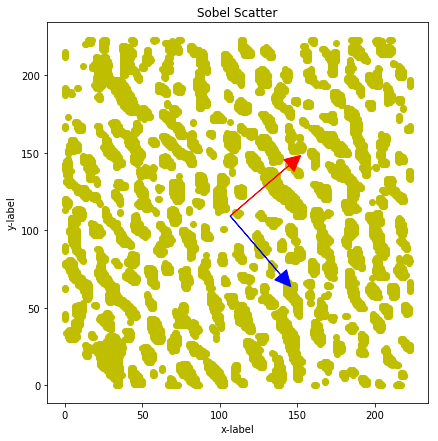

In [12]:
xsc = xsobel.mean()
ysc = ysobel.mean()

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.arrow(xsc,ysc,pca1x,pca1y, head_width=10, head_length=10, fc='r', ec='r')
plt.arrow(xsc,ysc,pca2x,pca2y, head_width=10, head_length=10, fc='b', ec='b')
plt.scatter(xsobel,ysobel,color='y')
plt.xlabel('x-label')
plt.ylabel('y-label')
plt.title('Sobel Scatter')
plt.show()

In [13]:
print('INFO: innomatics: maximum variance is with PCA-{}'.format(np.argmax(evals_thresh)+1))
if np.argmax(np.argmax(evals_thresh)) == 0:
    mul1= 25
    mul2 = 25
else:
    mul1= 25
    mul2 = 25
    
pca1 = evecs_thresh[:,0]
pca2 = evecs_thresh[:,1]
pca1x = math.cos(atan(pca1[1]/pca1[0]))*mul1
pca1y = math.sin(atan(pca1[1]/pca1[0]))*mul1
pca2x = math.cos(atan(pca2[1]/pca2[0]))*mul2
pca2y = math.sin(atan(pca2[1]/pca2[0]))*mul2

INFO: innomatics: maximum variance is with PCA-2


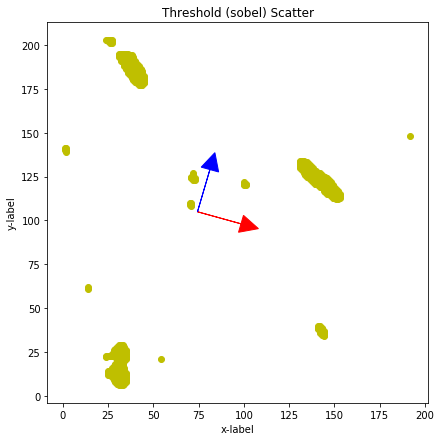

In [14]:
xsc = xthresh.mean()
ysc = ythresh.mean()

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.arrow(xsc,ysc,pca1x,pca1y, head_width=10, head_length=10, fc='r', ec='r')
plt.arrow(xsc,ysc,pca2x,pca2y, head_width=10, head_length=10, fc='b', ec='b')
plt.scatter(xthresh,ythresh,color='y')
plt.xlabel('x-label')
plt.ylabel('y-label')
plt.title('Threshold (sobel) Scatter')
plt.show()

# convolution

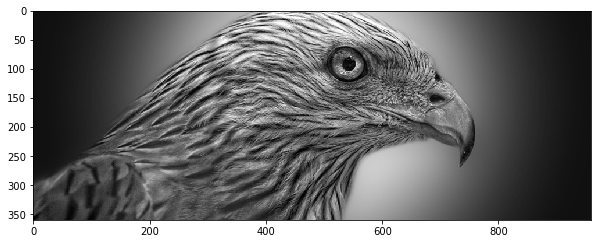

In [15]:
img = cv2.imread('kite.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,6))
plt.imshow(gray,cmap='gray')

In [15]:
# convolve
from scipy.signal import convolve2d

In [32]:
kernel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print(kernel)
print(kernel.shape)

In [30]:
cov = convolve2d(gray,kernel)
relu = np.maximum(cov,0)

(<matplotlib.image.AxesImage at 0x1cf5de8a048>, Text(0.5, 1.0, 'Apply Relu'))

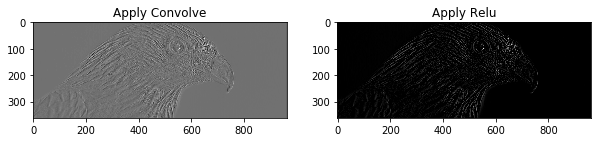

In [33]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(cov,cmap='gray'),plt.title('Apply Convolve')
plt.subplot(1,2,2)
plt.imshow(relu,cmap='gray'),plt.title('Apply Relu')
